Part 1: Identifying the dependent variable to predict stroke

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#importing the data
stroke_data = pd.read_csv("/content/Healthcare_data_stroke.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [39]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [40]:
#making groups of ages
stroke_data["age_bins"] = pd.cut(
    x=stroke_data["age"],
    bins=[0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80, 90, np.inf],
    labels=["1-20", "21-30", "31-40", "41 - 50", "51-60","61-70","71-80","81-90","91+"],
)
stroke_data["age_bins"]

0         61-70
1         61-70
2         71-80
3       41 - 50
4         71-80
         ...   
5105      71-80
5106      81-90
5107      31-40
5108      51-60
5109    41 - 50
Name: age_bins, Length: 5110, dtype: category
Categories (9, object): ['1-20' < '21-30' < '31-40' < '41 - 50' ... '61-70' < '71-80' < '81-90' < '91+']

In [ ]:
stroke_data.corr(method='pearson').style.background_gradient(cmap='viridis')

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_new,marriage_status,employment_status,residence,smoking,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,-0.028202,0.679125,-0.361642,0.014180,0.265199,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.020994,0.164243,-0.051761,-0.007913,0.111038,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.085447,0.114644,-0.028023,0.003092,0.048460,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.055180,0.155068,-0.050513,-0.004946,0.063437,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,-0.026678,0.341695,-0.304876,-0.000122,0.224473,0.042374
gender_new,-0.028202,0.020994,0.085447,0.055180,-0.026678,1.000000,-0.031005,0.056422,-0.006738,-0.062581,0.008929
marriage_status,0.679125,0.164243,0.114644,0.155068,0.341695,-0.031005,1.000000,-0.352722,0.006261,0.259647,0.108340
employment_status,-0.361642,-0.051761,-0.028023,-0.050513,-0.304876,0.056422,-0.352722,1.000000,-0.007316,-0.305927,-0.032316
residence,0.014180,-0.007913,0.003092,-0.004946,-0.000122,-0.006738,0.006261,-0.007316,1.000000,0.008237,0.015458
smoking,0.265199,0.111038,0.048460,0.063437,0.224473,-0.062581,0.259647,-0.305927,0.008237,1.000000,0.028123


In [41]:
#making groups of bmi
stroke_data["bmi_groups"] = pd.cut(
    x=stroke_data["bmi"],
    bins=[0,18, 24.99, 30.0, np.inf],
    labels=["underweight", "healthy", "overvweight", "obesiety"],
)
stroke_data["bmi_groups"]

0          obesiety
1               NaN
2          obesiety
3          obesiety
4           healthy
           ...     
5105            NaN
5106       obesiety
5107       obesiety
5108    overvweight
5109    overvweight
Name: bmi_groups, Length: 5110, dtype: category
Categories (4, object): ['underweight' < 'healthy' < 'overvweight' < 'obesiety']

In [42]:
#making groups of glucose
stroke_data["glucose_classification"] = pd.cut(
    x=stroke_data["avg_glucose_level"],
    bins=[0,100, 125, np.inf],
    labels=["normal", "prediabetes", "diabetes"],
)
stroke_data["glucose_classification"]

0          diabetes
1          diabetes
2       prediabetes
3          diabetes
4          diabetes
           ...     
5105         normal
5106       diabetes
5107         normal
5108       diabetes
5109         normal
Name: glucose_classification, Length: 5110, dtype: category
Categories (3, object): ['normal' < 'prediabetes' < 'diabetes']

<ipython-input-24-565b58c974f2>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

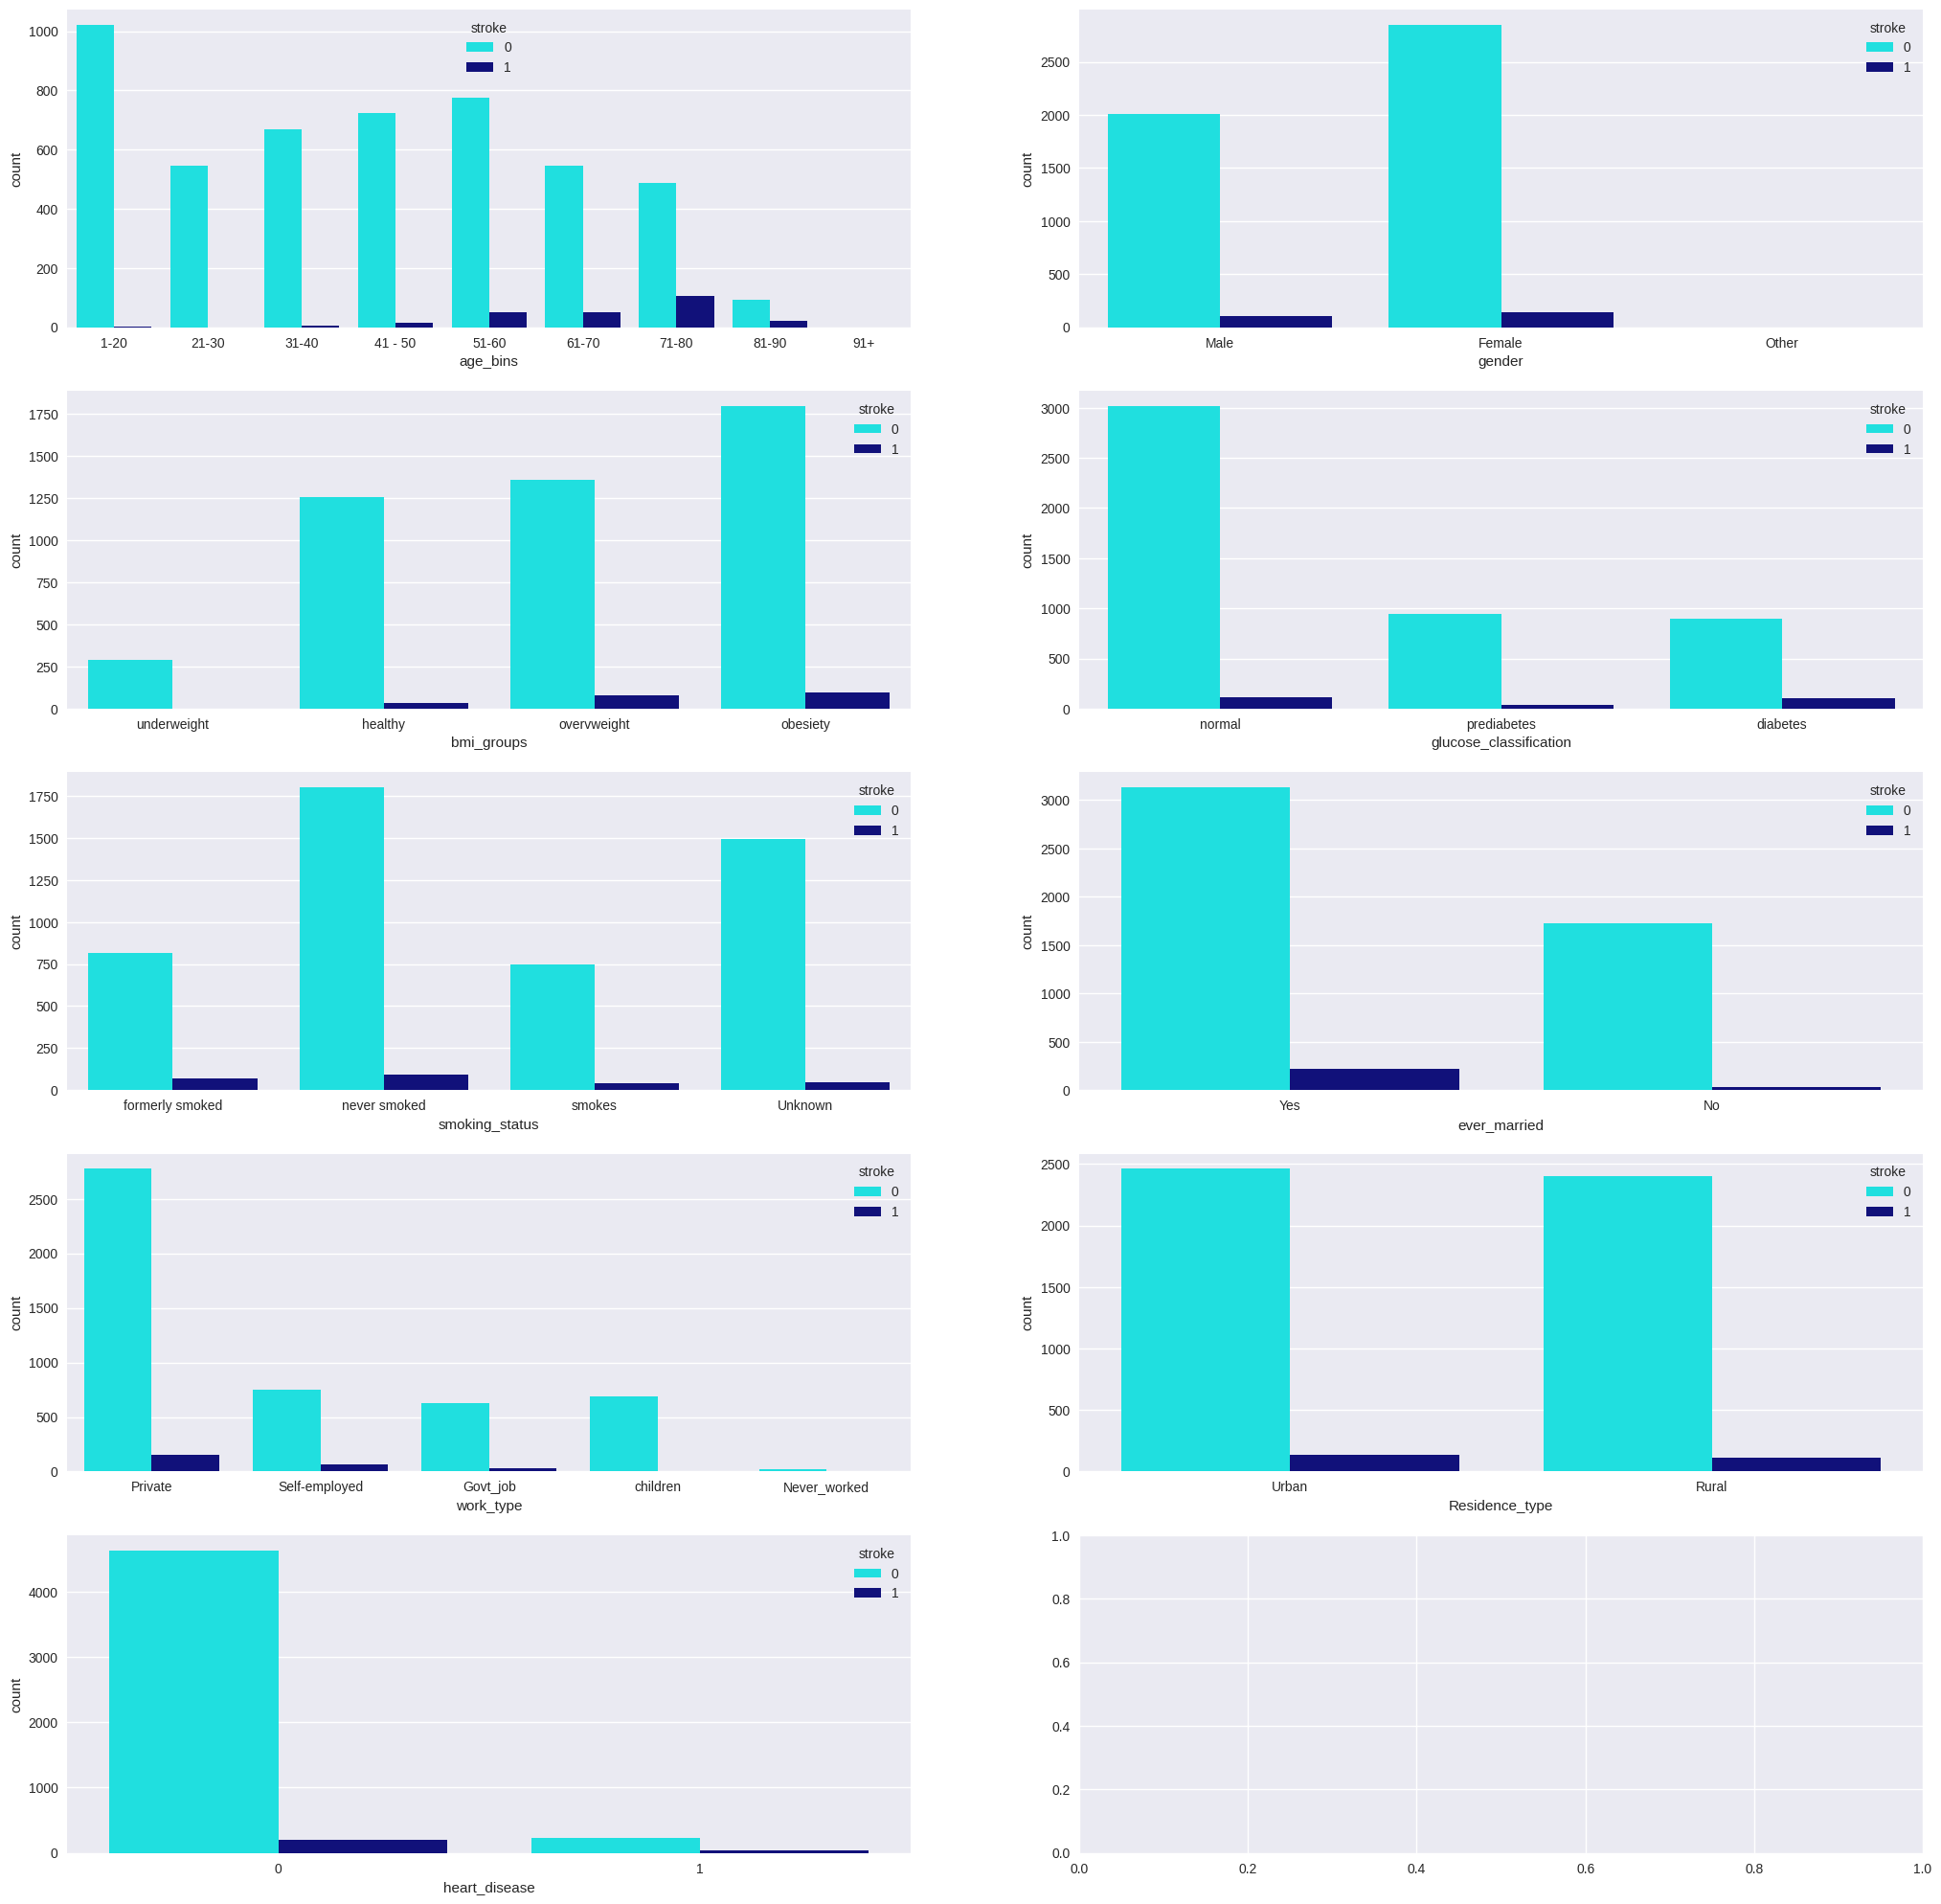

In [24]:
#code written from searborn library examples
#making count plots of all our fields
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2)

fig, axs = plt.subplots(5, 2, figsize=(25,25))
i=1

d = stroke_data.loc[:, ['age_bins','gender','bmi_groups','glucose_classification','smoking_status','ever_married',
                        'work_type','Residence_type', 'heart_disease']]


for feature in d:
    plt.subplot(5,2,i)
    sns.countplot(data=stroke_data, x=feature, hue="stroke", palette=['cyan',"darkblue"])
    i+=1

In [25]:
#checking if data has blanks
stroke_data.isna().sum()

id                          0
gender                      0
age                         0
hypertension                0
heart_disease               0
ever_married                0
work_type                   0
Residence_type              0
avg_glucose_level           0
bmi                       201
smoking_status              0
stroke                      0
age_bins                    0
bmi_groups                201
glucose_classification      0
dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
gender_class = le.fit_transform(stroke_data['gender'])
marriage_status = le.fit_transform(stroke_data['ever_married'])
employment_status = le.fit_transform(stroke_data['work_type'])
residence = le.fit_transform(stroke_data['Residence_type'])
smoking = le.fit_transform(stroke_data['smoking_status'])

# printing label
gender_class
marriage_status
residence
smoking

array([1, 2, 2, ..., 2, 1, 0])

In [44]:
stroke_data["gender_new"] = gender_class
stroke_data["marriage_status"] = marriage_status
stroke_data['employment_status'] = employment_status
stroke_data['residence'] = residence
stroke_data['smoking'] = smoking

stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins,bmi_groups,glucose_classification,gender_new,marriage_status,employment_status,residence,smoking
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,61-70,obesiety,diabetes,1,1,2,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,61-70,NaN,diabetes,0,1,3,0,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,71-80,obesiety,prediabetes,1,1,2,0,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,41 - 50,obesiety,diabetes,0,1,2,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,71-80,healthy,diabetes,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,71-80,NaN,normal,0,1,2,1,2
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,81-90,obesiety,diabetes,0,1,3,1,2
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,31-40,obesiety,normal,0,1,3,0,2
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,51-60,overvweight,diabetes,1,1,2,0,1


In [45]:
#removing extra columns
stroke_data.drop("gender",inplace=True,axis=1)
stroke_data.drop("ever_married",inplace=True,axis=1)
stroke_data.drop("work_type",inplace=True,axis=1)
stroke_data.drop("Residence_type",inplace=True,axis=1)
stroke_data.drop("smoking_status",inplace=True,axis=1)
stroke_data.drop("id",inplace=True,axis=1)
stroke_data.drop("bmi_groups",inplace=True,axis=1)
stroke_data.drop("glucose_classification",inplace=True,axis=1)
stroke_data.drop("age_bins",inplace=True,axis=1)
stroke_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_new,marriage_status,employment_status,residence,smoking
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
1,61.0,0,0,202.21,NaN,1,0,1,3,0,2
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,1,2,1,2
5106,81.0,0,0,125.20,40.0,0,0,1,3,1,2
5107,35.0,0,0,82.99,30.6,0,0,1,3,0,2
5108,51.0,0,0,166.29,25.6,0,1,1,2,0,1


In [46]:
#running KNN to predict the means for BMI so that we can fill in the blanks
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dataset = pd.DataFrame(imputer.fit_transform(stroke_data), columns = stroke_data.columns)

In [47]:
imputer = KNNImputer()
# fit on the dataset
imputer.fit(stroke_data)
# transform the dataset
Xtrans = imputer.transform(stroke_data)
# print total missing
Xtrans

array([[67.,  0.,  1., ...,  2.,  1.,  1.],
       [61.,  0.,  0., ...,  3.,  0.,  2.],
       [80.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [35.,  0.,  0., ...,  3.,  0.,  2.],
       [51.,  0.,  0., ...,  2.,  0.,  1.],
       [44.,  0.,  0., ...,  0.,  1.,  0.]])

In [48]:
np.savetxt("foo.csv", Xtrans, delimiter=",")

In [50]:
#importing the data
stroke_data_KNN = pd.read_csv("/content/Healthcare_data_stroke_KNN Imputed.csv")
stroke_data_KNN.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,33.66,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [52]:
stroke_data_KNN.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [53]:
#doing the one hot encoding for dataset
#code inspiration from geeks for geeks - https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
#categorical data
categorical_cols = ['heart_disease', 'hypertension', 'ever_married', 'gender','work_type','Residence_type','smoking_status'] 

#import pandas as pd
df = pd.get_dummies(stroke_data_KNN, columns = categorical_cols)

In [54]:
df = pd.DataFrame(df) 
df

,id,age,avg_glucose_level,bmi,stroke,heart_disease_0,heart_disease_1,hypertension_0,hypertension_1,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.60,1,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,202.21,33.66,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.50,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,171.23,34.40,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,174.12,24.00,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,27.10,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,125.20,40.00,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,82.99,30.60,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,166.29,25.60,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#separating the training and test data
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

norm = MinMaxScaler()
norm.fit(X_train)

#printing training set
X_train


,id,age,avg_glucose_level,bmi,heart_disease_0,heart_disease_1,hypertension_0,hypertension_1,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
802,4970,79.00,112.64,28.5,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3927,56137,62.00,88.32,36.3,1,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
2337,54590,21.00,59.52,33.7,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3910,36548,31.00,65.70,30.4,1,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1886,61171,31.00,59.63,19.9,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,43.00,88.00,30.6,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
466,1307,61.00,170.05,60.2,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3092,31481,1.16,97.28,17.8,1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3772,61827,80.00,196.08,31.0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [56]:
#normalising the data
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

#printing the training data to check if normalization happened correctly
X_train

array([[0.06715342, 0.96334311, 0.26553412, ..., 1.        , 0.        ,
        0.        ],
       [0.76938913, 0.75562072, 0.15326378, ..., 0.        , 0.        ,
        0.        ],
       [0.7481575 , 0.25464321, 0.02031207, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.43100065, 0.01221896, 0.19462653, ..., 0.        , 0.        ,
        0.        ],
       [0.84748089, 0.97556207, 0.65072477, ..., 1.        , 0.        ,
        0.        ],
       [0.39603091, 0.5601173 , 0.20787554, ..., 0.        , 0.        ,
        1.        ]])

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

**Using Decission tree as the first algorithm to predict the dependent variable **

In [58]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the Decision Tree Classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_decisiontree = dt_classifier.predict(X_test)

# Calculate the accuracy of the Decision Tree Classifier
accuracy = accuracy_score(y_test, predictions_decisiontree)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


In [59]:
#printing confusion matrix for the decision tree
print(confusion_matrix(y_test, predictions_decisiontree))
print()
print(classification_report(y_test, predictions_decisiontree))
print()
print('F1 score: ', f1_score(y_test, predictions_decisiontree))

[[960   0]
 [ 62   0]]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


F1 score:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 **Using Logistic Regression as the second algorithm to predict the dependent variable **

In [60]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
predictions_log = lg.predict(X_test)

In [61]:
#printing the confusion matrix for logistic regression
print(confusion_matrix(y_test, predictions_log))
print()
print(classification_report(y_test, predictions_log))
print()
print('F1 score: ', f1_score(y_test, predictions_log))

[[960   0]
 [ 62   0]]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


F1 score:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Using Random Forest as the third algorithm to predict the dependent variable **

In [62]:
rt = RandomForestClassifier(random_state=101)
rt.fit(X_train, y_train)
predictions_rec = rt.predict(X_test)

In [63]:
print(confusion_matrix(y_test, predictions_rec))
print()
print(classification_report(y_test, predictions_rec))
print()
print('F1 score: ', f1_score(y_test, predictions_rec))

[[960   0]
 [ 62   0]]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


F1 score:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


All of them are giving almost same level of accuracy so I'll go with logistics regressing

In [64]:
predictions_loc_train = lg.predict(X_train)
predictions_loc_train

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
print(confusion_matrix(y_train, predictions_loc_train))
print()
print(classification_report(y_train, predictions_loc_train))
print()
print('F1 score: ', f1_score(y_train, predictions_loc_train))

[[3901    0]
 [ 187    0]]

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3901
           1       0.00      0.00      0.00       187

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088


F1 score:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
#saving the training data
np.savetxt("train_log.csv", predictions_loc_train, delimiter=",")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns